# Figure 11.10 - CMIP6 temperature bias

* Adapted from Wehner et al. ([2020](https://www.sciencedirect.com/science/article/pii/S2212094719302440))
* re-draw Figure 1h and Figure 4h

Author: Mathias Hauser

In [1]:
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import mplotutils as mpu
import numpy as np
import xarray as xr

import conf
from utils import plot

In [2]:
mpl.rcParams["font.sans-serif"] = "Arial"

### Load Data

**bias**

In [3]:
fN = "../data/wehner_2020/TXx_TNn_error_CMIP6.nc"
bias_temp = xr.open_dataset(fN)
bias_temp = bias_temp.rename(latitude="lat", longitude="lon")

### Plot (bias)

In [4]:
no_data_color = "0.9"

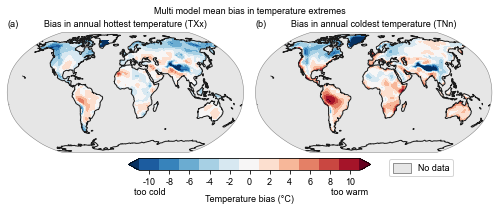

In [5]:
f, axes = plt.subplots(1, 2, subplot_kw=dict(projection=ccrs.Robinson()))

axes = axes.flatten()


# ====

levels = np.arange(-11, 12, 2)
opt = dict(
    levels=levels,
    mask_ocean=True,
    ocean_kws=dict(color=no_data_color),
    plotfunc="contourf",
)

# ====

ax = axes[0]

d = bias_temp["TXx_bias_cmip6"]
h = plot.one_map_flat(d, ax=ax, **opt)


# ====

ax = axes[1]

d = bias_temp["TNn_bias_cmip6"]
h = plot.one_map_flat(d, ax=ax, **opt)

# ====

for ax in axes:
    ax.patch.set_facecolor(no_data_color)


# ====

cbar = mpu.colorbar(
    h,
    axes[0],
    axes[1],
    shrink=0.5,
    orientation="horizontal",
    pad=0.05,
    size=0.1,
)

ticks = np.arange(-10, 11, 2)
ticklabels = [str(t) for t in ticks]
ticklabels[0] += "\ntoo cold"
ticklabels[-1] += "\ntoo warm"

cbar.set_ticks(ticks)
cbar.set_ticklabels(ticklabels)
cbar.set_label("Temperature bias (°C)", labelpad=-2, size=9)
cbar.ax.tick_params(labelsize=9)


# ==

ax = axes[1]

label = "No data"

dummy_patch = mpatches.Patch(fc=no_data_color, ec="0.2", label=label, lw=0.5)

ax.legend(
    handles=[dummy_patch],
    handlelength=2,
    handleheight=1.25,
    loc="lower center",
    bbox_to_anchor=(0.7, -0.2),
    fontsize=9,
    borderaxespad=0,
    frameon=True,
    # handler_map={mpl.text.Text: TextHandler()},
    ncol=1,
)


# ======

axes[0].set_title("Bias in annual hottest temperature (TXx)", fontsize=9)
axes[1].set_title("Bias in annual coldest temperature (TNn)", fontsize=9)

axes[0].set_title("(a)", loc="left", fontsize=9)
axes[1].set_title("(b)", loc="left", fontsize=9)

f.suptitle("Multi model mean bias in temperature extremes", fontsize=9)


left_right = 0.025

f.subplots_adjust(
    hspace=0.175,
    wspace=0.05,
    left=left_right,
    right=1 - left_right,
    bottom=0.25,
    top=0.85,
)

mpu.set_map_layout(axes, width=18)

f.canvas.draw()

fN = conf.figure_filename("txx_tnn_bias", "Figure_11.10_Wehner_temperature_bias")
plt.savefig(fN + ".pdf", dpi=300)
plt.savefig(fN + ".png", dpi=300)